In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
ids, ids.shape

(array([100000, 100001, 100002, ..., 349997, 349998, 349999]), (250000,))

In [7]:
tX.shape

(250000, 30)

## Do your thing crazy machine learning thing here :) ...

### 1. To check the correlations between each feature
#### [4/6,12,26,27,28], [6/4,12,26,27,28], [9/29], [12/4,626,27,28], [23/24,25], [24/23,25], [25/23,24], [26/4,6,12,27,28], [27/4,6,12,26,28], [28/4,6,12,26,27], [29/9] These features have strong correlations

In [8]:
correlation_matrix = np.corrcoef(tX, rowvar=0)

[Text(0, 0, 'X0'),
 Text(0, 0, 'X1'),
 Text(0, 0, 'X2'),
 Text(0, 0, 'X3'),
 Text(0, 0, 'X4'),
 Text(0, 0, 'X5'),
 Text(0, 0, 'X6'),
 Text(0, 0, 'X7'),
 Text(0, 0, 'X8'),
 Text(0, 0, 'X9'),
 Text(0, 0, 'X10'),
 Text(0, 0, 'X11'),
 Text(0, 0, 'X12'),
 Text(0, 0, 'X13'),
 Text(0, 0, 'X14'),
 Text(0, 0, 'X15'),
 Text(0, 0, 'X16'),
 Text(0, 0, 'X17'),
 Text(0, 0, 'X18'),
 Text(0, 0, 'X19'),
 Text(0, 0, 'X20'),
 Text(0, 0, 'X21'),
 Text(0, 0, 'X22'),
 Text(0, 0, 'X23'),
 Text(0, 0, 'X24'),
 Text(0, 0, 'X25'),
 Text(0, 0, 'X26'),
 Text(0, 0, 'X27'),
 Text(0, 0, 'X28'),
 Text(0, 0, 'X29')]

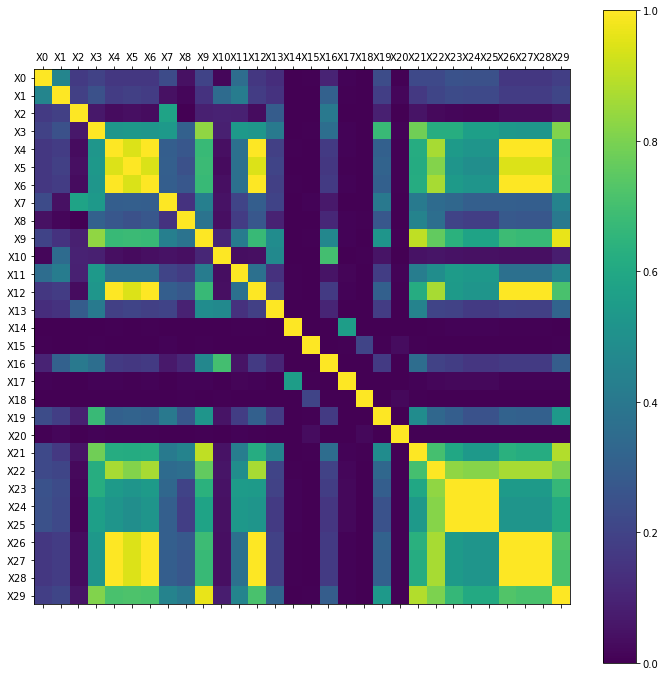

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
fig.colorbar(hot_img) 
ticks = np.arange(0, 30, 1) 
ax.set_xticks(ticks)
ax.set_yticks(ticks) 
names = ['X' + str(i) for i in range(tX.shape[1])] 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 

We could find that the columns with high correlations have some values around -1000 and 0.

Text(0.5, 1.0, 'tX28')

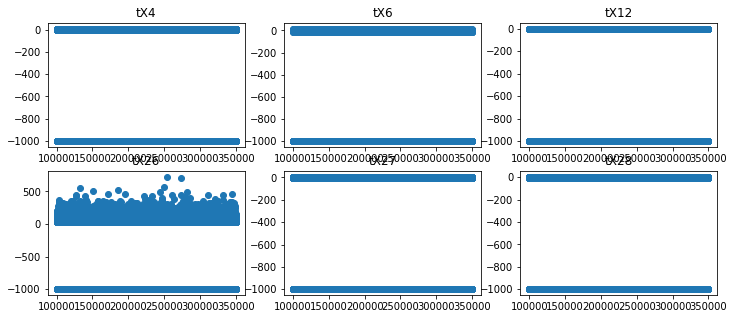

In [10]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(231)
ax1.scatter(ids, tX[:,4])
ax1.set_title('tX4')

ax2 = plt.subplot(232)
ax2.scatter(ids, tX[:,6])
ax2.set_title('tX6')

ax3 = plt.subplot(233)
ax3.scatter(ids, tX[:,12])
ax3.set_title('tX12')

ax4 = plt.subplot(234)
ax4.scatter(ids, tX[:,26])
ax4.set_title('tX26')

ax5 = plt.subplot(235)
ax5.scatter(ids, tX[:,27])
ax5.set_title('tX27')

ax6 = plt.subplot(236)
ax6.scatter(ids, tX[:,28])
ax6.set_title('tX28')

### 2. unique of each feature
#### Each column seems not having single value. However, the 23rd feature only has 4 values, hence it needs to be investigated more. 

In [11]:
for i in range(tX.shape[1]):
    print(i, len(np.unique(tX[:, i])))

0 108338
1 101637
2 100558
3 115563
4 7087
5 68366
6 16593
7 4692
8 59042
9 156098
10 5931
11 2829
12 1002
13 59639
14 4971
15 6285
16 61929
17 4987
18 6285
19 87836
20 6285
21 179740
22 4
23 86590
24 8558
25 6285
26 42464
27 8628
28 6286
29 103559


#### According to the description about this project, 'PRI_jet_num' is a categorical feature. Therefore, we should divide the data into different groups based on jet number and check the characteristics for each category.

In [12]:
np.unique(tX[:, 22])

array([0., 1., 2., 3.])

In [13]:
import csv

In [14]:
with open(DATA_TRAIN_PATH,'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]
    features = rows[0][2:]

In [15]:
features[22]

'PRI_jet_num'

### 3. Split the data into 4 groups(each corresponds to PRI_jet_num = 0, 1, 2, 3)

In [16]:
from preprocess import *

In [17]:
# split data into 4 groups
Train_set_X = []    # list 
Train_set_y = []
Train_set_ids = []
for i in range(4):   # self-defined function in order to split data into 4 groups based on jet_num
    y_jet, tx_jet, ids_jet = split_data(y, tX, ids, i) 
    Train_set_X.append(tx_jet)
    Train_set_y.append(y_jet)
    Train_set_ids.append(ids_jet)

### 4. To analyze the variance of columns for each group

To find out the zero-variance features and delete them since they have no contribution to the model trainning. After deleting the zero-variance features, each group has different amounts of features.

In [18]:
for i in range(4):   # self-defined function to check out the variance for each feature and find out the zero-variance features
    print(variance_analysis(Train_set_X[i]))

[4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29]
[4, 5, 6, 12, 22, 26, 27, 28]
[22]
[22]


In [19]:
# to delete the zero-variance columns
Feature_jet = []
for i in range(4):
    deleted_columns = variance_analysis(Train_set_X[i]) 
    Train_set_X[i],header = delete_columns(Train_set_X[i], deleted_columns, features)
    Feature_jet.append(header)

In [20]:
[Train_set_X[i].shape[1] for i in range(4)]

[18, 22, 29, 29]

### 5. To detect the abnormal values and fix them 

Self-defined functions to detect the abnormal values for each feature and fix them. The abnormal values mainly include the NULL values(-999) and outliers, that they are defined as out the range [mean-2*std, mean+2*std]. For NULL values, it is better use the median of non-NULL values to replace NULL values. For outliers, it is better replace them by the nearest boundary based on [mean-2*std, mean+2*std].

In [21]:
for i in range(4):
    fix_null(Train_set_X[i])
    fix_outlier(Train_set_X[i])

After fixing the abnormal values, all the features seem fixed.

In [22]:
# to check the processes
for i in range(4):
    print(Train_set_X[i][Train_set_X[i] == -999].shape)

(0,)
(0,)
(0,)
(0,)


In [23]:
abnormal_num = 0
for i in range(4):
    for col in range(Train_set_X[i].shape[1]):
        current_col = Train_set_X[i][:,col]
        std = np.std(current_col)
        mean = np.mean(current_col)
        left_boundary = mean - 2 * std
        right_boundary = mean + 2 * std
        abnormal_num += current_col[(current_col<left_boundary) \
                                        & (current_col>right_boundary)].shape[0]
print(abnormal_num)

0


### 6. To normalize the data using form: (x_i - x_min) / (x_max-x_min)

In [24]:
for i in range(4):
    Train_set_X[i] = normalization(Train_set_X[i])

In [25]:
np.max(Train_set_X[1],axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

### 7. To split data in to train and test sets

In [26]:
def split(y, x, r, seed=1):
    np.random.seed(seed)
    perm = np.random.permutation(len(y))
    sx = x[perm]
    sy = y[perm]
    sample = int(len(y) * r)
    x_training, x_test = sx[ : sample], sx[sample : ]
    y_training, y_test = sy[ : sample], sy[sample : ]
    return y_training, x_training, y_test, x_test

In [27]:
Y_train=[]
X_train=[]
Y_test=[]
X_test=[]
for i in range(4): 
    y_train,x_train,y_test,x_test = split(Train_set_y[i],Train_set_X[i],0.8)
    Y_train.append(y_train)
    X_train.append(x_train)
    Y_test.append(y_test)
    X_test.append(x_test)

In [130]:
from implement import *
from helper_for_implement import *

w_best = [] #把所有的w存在一个w_best里边，里边有四个组，每一个组存了1-6个model的对应的w

# 这里举了一个w_best的例子
w_best=[]
for i in range(4):
    w1 = [1.1+i,2,3,4]
    w2 = [2.2,3.3,4.4,5.5]
    w3 = [2,3,4,5]
    w4 = [0,i,2,3]
    w5 = [4,2,3,5]
    w6 = [3,5,2,4+i]
    w_best.append(np.array([w1,w2,w3,w4,w5,w6]))
    
w_best = np.array(w_best)
w_best

In [173]:
(X_train[0]@w_best[0][0]).shape

(79930, 1)

In [153]:
w_best = [] 
for i in range(4):
    _,w1=least_squares_GD(Y_train[i].reshape((-1,1)), X_train[i], np.ones((X_train[i].shape[1],1)), 1000, 0.07)
    _,w2=stochastic_gradient_descent(Y_train[i].reshape((-1,1)), X_train[i],np.ones((X_train[i].shape[1],1)), 200, 3000, 0.07)
    _,w3=least_squares(Y_train[i].reshape((-1,1)), X_train[i])
    _,w4=ridge_regression(Y_train[i].reshape((-1,1)), X_train[i], 0.01)
    _,w5=logistic_regression(Y_train[i].reshape((-1,1)), X_train[i], np.ones((X_train[i].shape[1],1)), 3000, 0.0007)
    _,w6=reg_logistic_regression(Y_train[i].reshape((-1,1)), X_train[i], 0.01, np.ones((X_train[i].shape[1],1)), 3000, 0.0007)
    w_best.append(np.array([w1,w2,w3,w4,w5,w6]))

ValueError: could not broadcast input array from shape (6,18,1) into shape (6)

In [160]:
#这个函数返回的是每一个组，对应的model1-5的预测百分比的列表（因为logistic的y取值为0-1，所以要单独拿出来算）
def prediction_report_5(y, tx, w_best, verbose = True):
    
    predictions = w_best @ tx.T
    predictions[:][predictions >= 0] = 1
    predictions[:][predictions < 0] = -1
    
    percentage_model_5 = []
    for i in range(5):
        correct_percentage = 100*np.sum(predictions[i] == y[i]) / float(len(predictions[i]))
        percentage_model_5.append(correct_percentage)
        
    if verbose:
        return percentage_model_5

In [161]:
#播报每一个model的预测百分比
def report_print(p):
    average_percentage = p/4
    print('Percentage of correct predictions is: %', average_percentage)

In [163]:
p_1 = prediction_report_5(Y_test[0],X_test[0],w_best[0]) #得到第一组的前五个（除了logistic），比如：（75，76，73，77，78）
p_2 = prediction_report_5(Y_test[1],X_test[1],w_best[1])
p_3 = prediction_report_5(Y_test[2],X_test[2],w_best[2])
p_4 = prediction_report_5(Y_test[3],X_test[3],w_best[3])

p = p_1+p_2+p_3+p_4

for i in range(5):
    report_print(p[i])
    print('/n')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 1)

In [198]:
def prediction_logistic_report(y, tx, w_best, verbose = True):

    predictions = w_best @ tx.T
    predictions[predictions > 0.5] = 1
    predictions[predictions <= 0.5] = 0
    correct_percentage = 100*np.sum(predictions == y) / float(len(predictions))
    if verbose:
        return correct_percentage

In [ ]:
pl_1 = prediction_logistic_report(change_labels_logistic(Y_test[0]),X_test[0],w_best[0]) #得到第一组的logistic对应的预测概率
pl_2 = prediction_logistic_report(change_labels_logistic(Y_test[1]),X_test[1],w_best[1])
pl_3 = prediction_logistic_report(change_labels_logistic(Y_test[2]),X_test[2],w_best[2])
pl_4 = prediction_logistic_report(change_labels_logistic(Y_test[3]),X_test[3],w_best[3])

pl = (pl_1+pl_2+pl_3+pl_4)/4 #所有组的logistic的预测百分比的均值
print('Percentage of correct predictions is: %', pl)

## Generate predictions and save ouput in csv format for submission:

In [33]:
DATA_TEST_PATH = '../data/train.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = 'prediction_haluhalu' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)